In [1]:
# Get Data
!pip install vaderSentiment

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
import matplotlib.dates as mdates
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.stem.porter import *
! pip install wordcloud
from wordcloud import WordCloud

data = pd.read_csv('nathanChenTweets30k.csv')

data.head()


,Unnamed: 0,Content Type,Tweet,A_username,A_followers,A_following,A_listed,A_posts,A_location,B_text,B_username,B_followers,B_following,B_listed,B_posts,B_location
0,0,Interaction,RT @joshispa: フィギュア金のネイサン・チェン、選曲と音楽センスが天才的な理由 ...,cocodoko116,1248,475,59,184430,"Yokohama,Japan",NaN,world_news_ja,19370,3062,264,43726,東京都港区
1,1,Interaction,RT @joshispa: フィギュア金のネイサン・チェン、選曲と音楽センスが天才的な理由 ...,kixx327,261,591,18,75758,ユンジョンハンを案内したい京都市民,NaN,world_news_ja,19370,3062,264,43726,東京都港区
2,2,Interaction,RT @joshispa: フィギュア金のネイサン・チェン、選曲と音楽センスが天才的な理由 ...,12nao09,181,195,5,38960,NaN,NaN,world_news_ja,19370,3062,264,43726,東京都港区
3,3,Interaction,RT @YukiSNYC: Nathan Chen’s Gold-Medal Routine...,tsukianul,520,278,2,3516,NaN,NaN,world_news_ja,3080,1219,83,9917,"New York, NY"
4,4,Interaction,RT @insider_ct: The Mother Lode: Why I can’t l...,natecurlsquad,228,279,3,7090,NaN,NaN,world_news_ja,513,43,9,6938,Connecticut


In [2]:
def remove_pattern(input_txt, pattern):
  r = re.findall(pattern, input_txt)
  for i in r:
    input_txt = re.sub(i, '', input_txt)
  return input_txt

In [3]:
# Remove emoticons from column 'Author'
data['A_username'] = data['A_username'].str.replace("[^\w()'+]", " ")
data['B_username'] = data['B_username'].str.replace("[^\w()'+]", " ")
data

/var/folders/h3/gdkjgm794gbfyrxhf5g4zkqc0000gn/T/ipykernel_31702/167577286.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['A_username'] = data['A_username'].str.replace("[^\w()'+]", " ")
/var/folders/h3/gdkjgm794gbfyrxhf5g4zkqc0000gn/T/ipykernel_31702/167577286.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['B_username'] = data['B_username'].str.replace("[^\w()'+]", " ")


,Unnamed: 0,Content Type,Tweet,A_username,A_followers,A_following,A_listed,A_posts,A_location,B_text,B_username,B_followers,B_following,B_listed,B_posts,B_location
0,0,Interaction,RT @joshispa: フィギュア金のネイサン・チェン、選曲と音楽センスが天才的な理由 ...,cocodoko116,1248,475,59,184430,"Yokohama,Japan",NaN,world_news_ja,19370,3062,264,43726,東京都港区
1,1,Interaction,RT @joshispa: フィギュア金のネイサン・チェン、選曲と音楽センスが天才的な理由 ...,kixx327,261,591,18,75758,ユンジョンハンを案内したい京都市民,NaN,world_news_ja,19370,3062,264,43726,東京都港区
2,2,Interaction,RT @joshispa: フィギュア金のネイサン・チェン、選曲と音楽センスが天才的な理由 ...,12nao09,181,195,5,38960,NaN,NaN,world_news_ja,19370,3062,264,43726,東京都港区
3,3,Interaction,RT @YukiSNYC: Nathan Chen’s Gold-Medal Routine...,tsukianul,520,278,2,3516,NaN,NaN,world_news_ja,3080,1219,83,9917,"New York, NY"
4,4,Interaction,RT @insider_ct: The Mother Lode: Why I can’t l...,natecurlsquad,228,279,3,7090,NaN,NaN,world_news_ja,513,43,9,6938,Connecticut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29991,29991,Interaction,RT @skinnyclit: nathan chen can’t do this http...,byunmink,20,384,0,32669,💭 หวีดนิยาย,NaN,Ginettedu37,237,276,0,2916,NaN
29992,29992,Interaction,RT @edward_cullOnn: La comentarista de Claro S...,ifsminions,64,92,0,905,⚞ ♡ ⚟ 👻 ˖ ݁ .,NaN,Ginettedu37,17,154,0,624,NaN
29993,29993,Interaction,RT @skinnyclit: nathan chen can’t do this http...,rainvvie,456,1115,3,18788,they/them,NaN,Ginettedu37,237,276,0,2916,NaN
29994,29994,Interaction,"RT @Bokutogod: Nathan Chen? No sé, yo solo con...",VentusFowl,511,1989,7,25563,"Puebla, México",NaN,Ginettedu37,119,256,1,6495,Con tu vieja


In [4]:
data['Tidy_Content'] = np.vectorize(remove_pattern)(data['Tweet'], "@[\w]*")
data.head()

,Unnamed: 0,Content Type,Tweet,A_username,A_followers,A_following,A_listed,A_posts,A_location,B_text,B_username,B_followers,B_following,B_listed,B_posts,B_location,Tidy_Content
0,0,Interaction,RT @joshispa: フィギュア金のネイサン・チェン、選曲と音楽センスが天才的な理由 ...,cocodoko116,1248,475,59,184430,"Yokohama,Japan",NaN,world_news_ja,19370,3062,264,43726,東京都港区,RT : フィギュア金のネイサン・チェン、選曲と音楽センスが天才的な理由 https://t...
1,1,Interaction,RT @joshispa: フィギュア金のネイサン・チェン、選曲と音楽センスが天才的な理由 ...,kixx327,261,591,18,75758,ユンジョンハンを案内したい京都市民,NaN,world_news_ja,19370,3062,264,43726,東京都港区,RT : フィギュア金のネイサン・チェン、選曲と音楽センスが天才的な理由 https://t...
2,2,Interaction,RT @joshispa: フィギュア金のネイサン・チェン、選曲と音楽センスが天才的な理由 ...,12nao09,181,195,5,38960,NaN,NaN,world_news_ja,19370,3062,264,43726,東京都港区,RT : フィギュア金のネイサン・チェン、選曲と音楽センスが天才的な理由 https://t...
3,3,Interaction,RT @YukiSNYC: Nathan Chen’s Gold-Medal Routine...,tsukianul,520,278,2,3516,NaN,NaN,world_news_ja,3080,1219,83,9917,"New York, NY",RT : Nathan Chen’s Gold-Medal Routine Demonstr...
4,4,Interaction,RT @insider_ct: The Mother Lode: Why I can’t l...,natecurlsquad,228,279,3,7090,NaN,NaN,world_news_ja,513,43,9,6938,Connecticut,RT : The Mother Lode: Why I can’t look away fr...


In [5]:
data['Tidy_Content'] = data['Tidy_Content'].str.replace("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", " ")
data.head()

/var/folders/h3/gdkjgm794gbfyrxhf5g4zkqc0000gn/T/ipykernel_31702/3976099435.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Tidy_Content'] = data['Tidy_Content'].str.replace("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", " ")


,Unnamed: 0,Content Type,Tweet,A_username,A_followers,A_following,A_listed,A_posts,A_location,B_text,B_username,B_followers,B_following,B_listed,B_posts,B_location,Tidy_Content
0,0,Interaction,RT @joshispa: フィギュア金のネイサン・チェン、選曲と音楽センスが天才的な理由 ...,cocodoko116,1248,475,59,184430,"Yokohama,Japan",NaN,world_news_ja,19370,3062,264,43726,東京都港区,RT : フィギュア金のネイサン・チェン、選曲と音楽センスが天才的な理由 #北京オリンピ...
1,1,Interaction,RT @joshispa: フィギュア金のネイサン・チェン、選曲と音楽センスが天才的な理由 ...,kixx327,261,591,18,75758,ユンジョンハンを案内したい京都市民,NaN,world_news_ja,19370,3062,264,43726,東京都港区,RT : フィギュア金のネイサン・チェン、選曲と音楽センスが天才的な理由 #北京オリンピ...
2,2,Interaction,RT @joshispa: フィギュア金のネイサン・チェン、選曲と音楽センスが天才的な理由 ...,12nao09,181,195,5,38960,NaN,NaN,world_news_ja,19370,3062,264,43726,東京都港区,RT : フィギュア金のネイサン・チェン、選曲と音楽センスが天才的な理由 #北京オリンピ...
3,3,Interaction,RT @YukiSNYC: Nathan Chen’s Gold-Medal Routine...,tsukianul,520,278,2,3516,NaN,NaN,world_news_ja,3080,1219,83,9917,"New York, NY",RT : Nathan Chen’s Gold-Medal Routine Demonstr...
4,4,Interaction,RT @insider_ct: The Mother Lode: Why I can’t l...,natecurlsquad,228,279,3,7090,NaN,NaN,world_news_ja,513,43,9,6938,Connecticut,RT : The Mother Lode: Why I can’t look away fr...


In [6]:
data['Tidy_Content'] = data['Tidy_Content'].str.replace("[^a-zA-Z#!]", " ")
data.head()

/var/folders/h3/gdkjgm794gbfyrxhf5g4zkqc0000gn/T/ipykernel_31702/1522428819.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Tidy_Content'] = data['Tidy_Content'].str.replace("[^a-zA-Z#!]", " ")


,Unnamed: 0,Content Type,Tweet,A_username,A_followers,A_following,A_listed,A_posts,A_location,B_text,B_username,B_followers,B_following,B_listed,B_posts,B_location,Tidy_Content
0,0,Interaction,RT @joshispa: フィギュア金のネイサン・チェン、選曲と音楽センスが天才的な理由 ...,cocodoko116,1248,475,59,184430,"Yokohama,Japan",NaN,world_news_ja,19370,3062,264,43726,東京都港区,RT # ...
1,1,Interaction,RT @joshispa: フィギュア金のネイサン・チェン、選曲と音楽センスが天才的な理由 ...,kixx327,261,591,18,75758,ユンジョンハンを案内したい京都市民,NaN,world_news_ja,19370,3062,264,43726,東京都港区,RT # ...
2,2,Interaction,RT @joshispa: フィギュア金のネイサン・チェン、選曲と音楽センスが天才的な理由 ...,12nao09,181,195,5,38960,NaN,NaN,world_news_ja,19370,3062,264,43726,東京都港区,RT # ...
3,3,Interaction,RT @YukiSNYC: Nathan Chen’s Gold-Medal Routine...,tsukianul,520,278,2,3516,NaN,NaN,world_news_ja,3080,1219,83,9917,"New York, NY",RT Nathan Chen s Gold Medal Routine Demonstr...
4,4,Interaction,RT @insider_ct: The Mother Lode: Why I can’t l...,natecurlsquad,228,279,3,7090,NaN,NaN,world_news_ja,513,43,9,6938,Connecticut,RT The Mother Lode Why I can t look away fr...


In [7]:
data['Tidy_Content'] = data['Tidy_Content'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))
data.head()

,Unnamed: 0,Content Type,Tweet,A_username,A_followers,A_following,A_listed,A_posts,A_location,B_text,B_username,B_followers,B_following,B_listed,B_posts,B_location,Tidy_Content
0,0,Interaction,RT @joshispa: フィギュア金のネイサン・チェン、選曲と音楽センスが天才的な理由 ...,cocodoko116,1248,475,59,184430,"Yokohama,Japan",NaN,world_news_ja,19370,3062,264,43726,東京都港区,#Nathan #Chen
1,1,Interaction,RT @joshispa: フィギュア金のネイサン・チェン、選曲と音楽センスが天才的な理由 ...,kixx327,261,591,18,75758,ユンジョンハンを案内したい京都市民,NaN,world_news_ja,19370,3062,264,43726,東京都港区,#Nathan #Chen
2,2,Interaction,RT @joshispa: フィギュア金のネイサン・チェン、選曲と音楽センスが天才的な理由 ...,12nao09,181,195,5,38960,NaN,NaN,world_news_ja,19370,3062,264,43726,東京都港区,#Nathan #Chen
3,3,Interaction,RT @YukiSNYC: Nathan Chen’s Gold-Medal Routine...,tsukianul,520,278,2,3516,NaN,NaN,world_news_ja,3080,1219,83,9917,"New York, NY",Nathan Chen Gold Medal Routine Demonstrates Mu...
4,4,Interaction,RT @insider_ct: The Mother Lode: Why I can’t l...,natecurlsquad,228,279,3,7090,NaN,NaN,world_news_ja,513,43,9,6938,Connecticut,Mother Lode look away from Olympic gold medali...


In [8]:
tokenize_tweets = data['Tidy_Content'].apply(lambda x: x.split()) 
tokenize_tweets.head()

0                                     [#Nathan, #Chen]
1                                     [#Nathan, #Chen]
2                                     [#Nathan, #Chen]
3    [Nathan, Chen, Gold, Medal, Routine, Demonstra...
4    [Mother, Lode, look, away, from, Olympic, gold...
Name: Tidy_Content, dtype: object

In [9]:
stemmer = PorterStemmer()

tokenize_tweets = tokenize_tweets.apply(lambda x: [stemmer.stem(i) for i in x])
tokenize_tweets.head()


0                                     [#nathan, #chen]
1                                     [#nathan, #chen]
2                                     [#nathan, #chen]
3    [nathan, chen, gold, medal, routin, demonstr, ...
4    [mother, lode, look, away, from, olymp, gold, ...
Name: Tidy_Content, dtype: object

In [10]:
for i in range(len(tokenize_tweets)):
  tokenize_tweets[i] = ' '.join(tokenize_tweets[i])

data['Tidy_Content'] = tokenize_tweets
data.head()

,Unnamed: 0,Content Type,Tweet,A_username,A_followers,A_following,A_listed,A_posts,A_location,B_text,B_username,B_followers,B_following,B_listed,B_posts,B_location,Tidy_Content
0,0,Interaction,RT @joshispa: フィギュア金のネイサン・チェン、選曲と音楽センスが天才的な理由 ...,cocodoko116,1248,475,59,184430,"Yokohama,Japan",NaN,world_news_ja,19370,3062,264,43726,東京都港区,#nathan #chen
1,1,Interaction,RT @joshispa: フィギュア金のネイサン・チェン、選曲と音楽センスが天才的な理由 ...,kixx327,261,591,18,75758,ユンジョンハンを案内したい京都市民,NaN,world_news_ja,19370,3062,264,43726,東京都港区,#nathan #chen
2,2,Interaction,RT @joshispa: フィギュア金のネイサン・チェン、選曲と音楽センスが天才的な理由 ...,12nao09,181,195,5,38960,NaN,NaN,world_news_ja,19370,3062,264,43726,東京都港区,#nathan #chen
3,3,Interaction,RT @YukiSNYC: Nathan Chen’s Gold-Medal Routine...,tsukianul,520,278,2,3516,NaN,NaN,world_news_ja,3080,1219,83,9917,"New York, NY",nathan chen gold medal routin demonstr music f...
4,4,Interaction,RT @insider_ct: The Mother Lode: Why I can’t l...,natecurlsquad,228,279,3,7090,NaN,NaN,world_news_ja,513,43,9,6938,Connecticut,mother lode look away from olymp gold medalist...


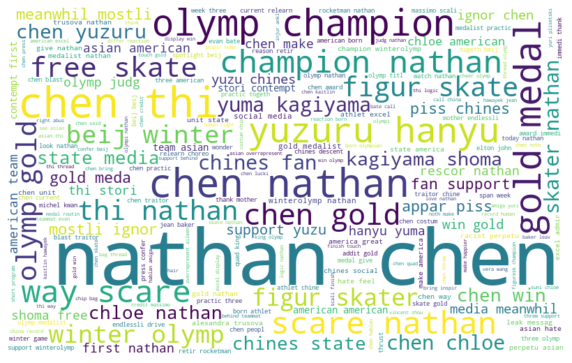

In [11]:
all_words = ' '.join([text for text in data['Tidy_Content']])

wordcloud = WordCloud(width=800, height=500, random_state=21, background_color='white',  max_font_size=110).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [12]:
# Hashtags mentions

def hashtag_extract(x):
  hashtags = []
  
  for i in x:
    ht = re.findall(r"#(\w+)", i)
    hashtags.append(ht)
    
  return hashtags

# Extract hashtags

hashtags = hashtag_extract(data['Tidy_Content'])

# Unnesting list

hashtags = sum(hashtags, [])

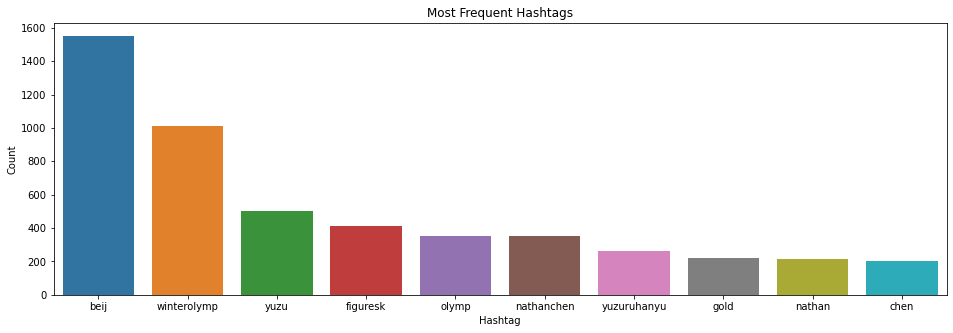

In [13]:
freq_dist = nltk.FreqDist(hashtags)

graph = pd.DataFrame({'Hashtag': list(freq_dist.keys()), 'Count': list(freq_dist.values())})

# Top 10 Most Frequent Hashtags

graph = graph.nlargest(columns="Count", n = 10)
plt.figure(figsize=(16,5))
axis = sns.barplot(data=graph, x="Hashtag", y="Count")
axis.set(ylabel='Count')
plt.title('Most Frequent Hashtags')
plt.show()

In [14]:
analyser = SentimentIntensityAnalyzer()

scores = []
for sentence in data['Tidy_Content']:
  score = analyser.polarity_scores(sentence)
  scores.append(score)
  
scores = pd.DataFrame(scores)

data['Compound'] = scores['compound']
data['Negative'] = scores['neg']
data['Neutral'] = scores['neu']
data['Positive'] = scores['pos']
data.head()

,Unnamed: 0,Content Type,Tweet,A_username,A_followers,A_following,A_listed,A_posts,A_location,B_text,...,B_followers,B_following,B_listed,B_posts,B_location,Tidy_Content,Compound,Negative,Neutral,Positive
0,0,Interaction,RT @joshispa: フィギュア金のネイサン・チェン、選曲と音楽センスが天才的な理由 ...,cocodoko116,1248,475,59,184430,"Yokohama,Japan",NaN,...,19370,3062,264,43726,東京都港区,#nathan #chen,0.0000,0.0,1.000,0.000
1,1,Interaction,RT @joshispa: フィギュア金のネイサン・チェン、選曲と音楽センスが天才的な理由 ...,kixx327,261,591,18,75758,ユンジョンハンを案内したい京都市民,NaN,...,19370,3062,264,43726,東京都港区,#nathan #chen,0.0000,0.0,1.000,0.000
2,2,Interaction,RT @joshispa: フィギュア金のネイサン・チェン、選曲と音楽センスが天才的な理由 ...,12nao09,181,195,5,38960,NaN,NaN,...,19370,3062,264,43726,東京都港区,#nathan #chen,0.0000,0.0,1.000,0.000
3,3,Interaction,RT @YukiSNYC: Nathan Chen’s Gold-Medal Routine...,tsukianul,520,278,2,3516,NaN,NaN,...,3080,1219,83,9917,"New York, NY",nathan chen gold medal routin demonstr music f...,0.4767,0.0,0.721,0.279
4,4,Interaction,RT @insider_ct: The Mother Lode: Why I can’t l...,natecurlsquad,228,279,3,7090,NaN,NaN,...,513,43,9,6938,Connecticut,mother lode look away from olymp gold medalist...,0.0000,0.0,1.000,0.000


In [15]:
def word_extract(x):
  words = []
  
  for i in x:
    ht = re.findall(r"(\w+)", i)
    words.append(ht)
    
  return words

# Extract words

words = word_extract(data['Tidy_Content'])

# words

# Unnesting list

words = sum(words, [])

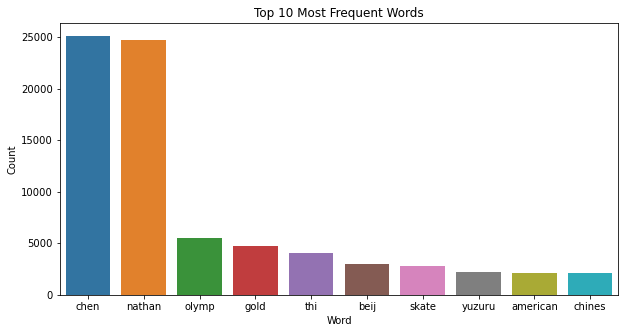

In [16]:
# Frequency Distribution

a = nltk.FreqDist(words)

b = pd.DataFrame({'Word': list(a.keys()), 'Count': list(a.values())})
length = len(b)

# Top 10 Most Frequent Words
b = b.nlargest(columns="Count", n = 10)
plt.figure(figsize=(10,5))
axis = sns.barplot(data=b, x='Word', y='Count')
axis.set(ylabel='Count')
plt.title('Top 10 Most Frequent Words')
plt.show()

In [17]:
# Set type of polarity
polarity = []

for i in range(len(data)):
  if (data['Compound'][i] < 0):
    polarity.append("Negative")
  elif (data['Compound'][i] > 0):
    polarity.append("Positive")
  else:
    polarity.append("Neutral")
    
polarity = pd.DataFrame(polarity)
data['Polarity'] = polarity
data.head()

,Unnamed: 0,Content Type,Tweet,A_username,A_followers,A_following,A_listed,A_posts,A_location,B_text,...,B_following,B_listed,B_posts,B_location,Tidy_Content,Compound,Negative,Neutral,Positive,Polarity
0,0,Interaction,RT @joshispa: フィギュア金のネイサン・チェン、選曲と音楽センスが天才的な理由 ...,cocodoko116,1248,475,59,184430,"Yokohama,Japan",NaN,...,3062,264,43726,東京都港区,#nathan #chen,0.0000,0.0,1.000,0.000,Neutral
1,1,Interaction,RT @joshispa: フィギュア金のネイサン・チェン、選曲と音楽センスが天才的な理由 ...,kixx327,261,591,18,75758,ユンジョンハンを案内したい京都市民,NaN,...,3062,264,43726,東京都港区,#nathan #chen,0.0000,0.0,1.000,0.000,Neutral
2,2,Interaction,RT @joshispa: フィギュア金のネイサン・チェン、選曲と音楽センスが天才的な理由 ...,12nao09,181,195,5,38960,NaN,NaN,...,3062,264,43726,東京都港区,#nathan #chen,0.0000,0.0,1.000,0.000,Neutral
3,3,Interaction,RT @YukiSNYC: Nathan Chen’s Gold-Medal Routine...,tsukianul,520,278,2,3516,NaN,NaN,...,1219,83,9917,"New York, NY",nathan chen gold medal routin demonstr music f...,0.4767,0.0,0.721,0.279,Positive
4,4,Interaction,RT @insider_ct: The Mother Lode: Why I can’t l...,natecurlsquad,228,279,3,7090,NaN,NaN,...,43,9,6938,Connecticut,mother lode look away from olymp gold medalist...,0.0000,0.0,1.000,0.000,Neutral


In [18]:
data.to_csv('nathanChenSentiment30k.csv')